**Q1: Implementing a Basic Autoencoder**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training autoencoder with latent_dim = 16 …
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.4154 - val_loss: 0.2179
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2065 - val_loss: 0.1808
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1769 - val_loss: 0.1620
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1602 - val_loss: 0.1509
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1506 - val_loss: 0.1447
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1451 - val_loss: 0.1412
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1421 - val_loss: 0.1386
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1397 - val_loss: 0.1367
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1380 - val_loss: 0.1348
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1360 - val_loss: 0.1333
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1

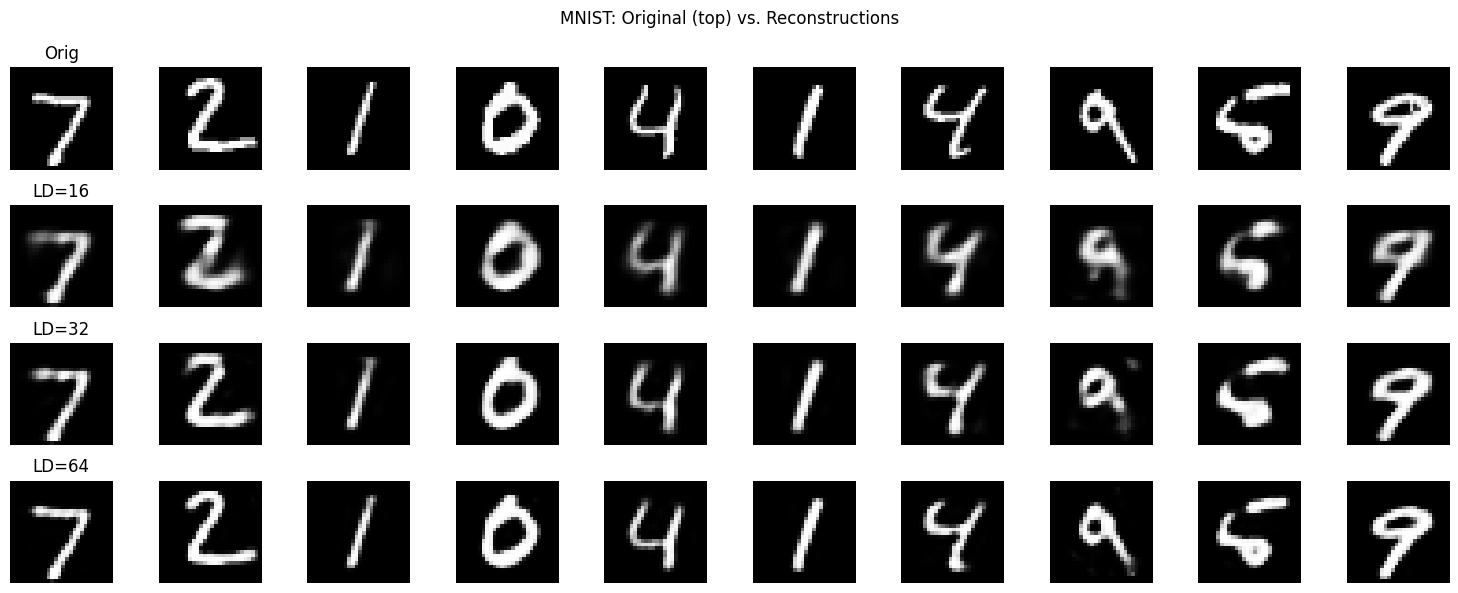


Final validation losses:
Latent dim 16: 0.1277
Latent dim 32: 0.0922
Latent dim 64: 0.0730


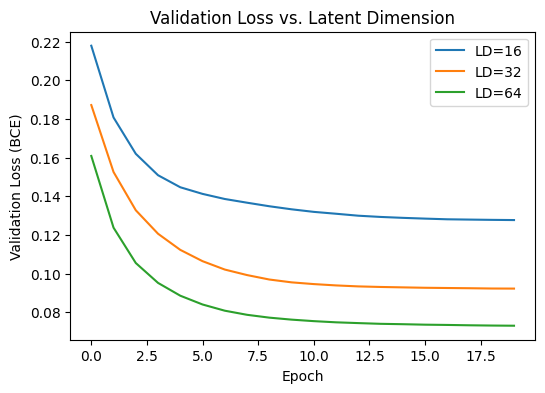

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the MNIST dataset and normalize to [0, 1]
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten 28x28 images to 784‑dim vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


def build_autoencoder(latent_dim: int = 32) -> tf.keras.Model:
    """Builds and returns a fully‑connected autoencoder with a single hidden layer.

    Args:
        latent_dim: Size of the latent (bottleneck) representation.

    Returns:
        Compiled Keras Model ready for training.
    """
    # Encoder
    inputs = layers.Input(shape=(784,))
    encoded = layers.Dense(latent_dim, activation="relu", name="encoder_dense")(inputs)

    # Decoder
    decoded = layers.Dense(784, activation="sigmoid", name="decoder_dense")(encoded)

    # Autoencoder model
    autoencoder = models.Model(inputs, decoded, name=f"autoencoder_ld{latent_dim}")
    autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
    return autoencoder


# 2‑3. Train autoencoders with different latent dimensions
latent_dims = [16, 32, 64]
histories = {}
recons = {}

for ld in latent_dims:
    print(f"\nTraining autoencoder with latent_dim = {ld} …")
    ae = build_autoencoder(ld)
    histories[ld] = ae.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test),
        verbose=1,
    )
    # Store reconstructions for the first 10 test images
    recons[ld] = ae.predict(x_test[:10], verbose=0)

# 4. Plot original vs. reconstructed images
n = 10  # how many digits to display
rows = len(latent_dims) + 1
plt.figure(figsize=(n * 1.5, rows * 1.5))

# First row: originals
for i in range(n):
    ax = plt.subplot(rows, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Orig" if i == 0 else "")
    plt.axis("off")

# Subsequent rows: reconstructions per latent_dim
for r, ld in enumerate(latent_dims, start=1):
    for i in range(n):
        ax = plt.subplot(rows, n, r * n + i + 1)
        plt.imshow(recons[ld][i].reshape(28, 28), cmap="gray")
        if i == 0:
            plt.title(f"LD={ld}")
        plt.axis("off")

plt.suptitle("MNIST: Original (top) vs. Reconstructions")
plt.tight_layout()
plt.show()

# 5. Simple quantitative comparison of reconstruction loss
print("\nFinal validation losses:")
for ld in latent_dims:
    val_loss = histories[ld].history["val_loss"][-1]
    print(f"Latent dim {ld:>2}: {val_loss:.4f}")

# Optional: plot loss curves
plt.figure(figsize=(6, 4))
for ld in latent_dims:
    plt.plot(histories[ld].history["val_loss"], label=f"LD={ld}")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss (BCE)")
plt.title("Validation Loss vs. Latent Dimension")
plt.legend()
plt.show()

**Q2: Implementing a Denoising Autoencoder**

Training basic autoencoder …
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3854 - val_loss: 0.1922
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1814 - val_loss: 0.1537
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1492 - val_loss: 0.1331
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1310 - val_loss: 0.1210
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1199 - val_loss: 0.1128
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1128 - val_loss: 0.1071
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1071 - val_loss: 0.1028
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1031 - val_loss: 0.0995
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1002 - val_loss: 0.0972
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0982 - val_loss: 0.0955
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0966 - val_loss: 0.0945
Epoch 12/20
235/235 ━━━

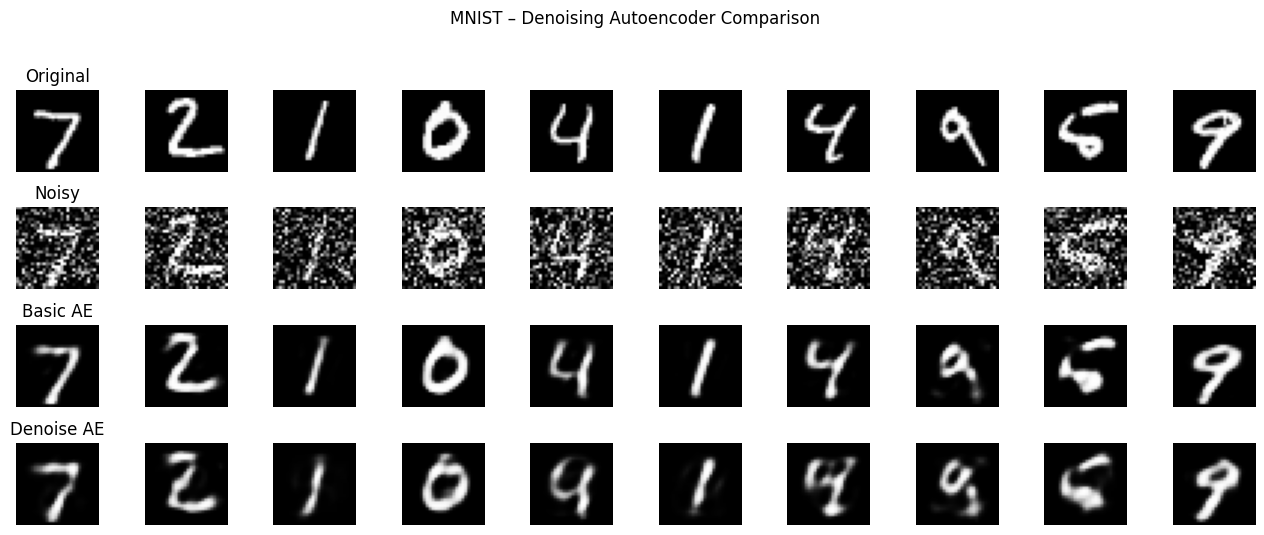


Final Validation BCE:
Basic AE      : 0.0921
Denoising AE  : 0.1254


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# =============================
# MNIST Denoising Autoencoder
# =============================
# 1. Load & normalise data
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Helper: build a simple dense autoencoder

def build_autoencoder(latent_dim: int = 32):
    inputs = layers.Input(shape=(784,))
    encoded = layers.Dense(latent_dim, activation="relu")(inputs)
    decoded = layers.Dense(784, activation="sigmoid")(encoded)
    ae = models.Model(inputs, decoded)
    ae.compile(optimizer="adam", loss="binary_crossentropy")
    return ae

# 2. Create noisy inputs (Gaussian, mean=0, std=0.5)
noise_factor = 0.5
rng = np.random.default_rng(seed=42)

def add_noise(x):
    noisy = x + noise_factor * rng.normal(loc=0.0, scale=1.0, size=x.shape)
    return np.clip(noisy, 0.0, 1.0)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# 3. Train basic & denoising autoencoders (latent dim =32)
basic_ae = build_autoencoder(32)
denoise_ae = build_autoencoder(32)

print("Training basic autoencoder …")
basic_hist = basic_ae.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1,
)

print("\nTraining denoising autoencoder …")
denoise_hist = denoise_ae.fit(
    x_train_noisy,
    x_train,  # targets are clean images
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test),
    verbose=1,
)

# 4. Visualise: original | noisy | recon (basic) | recon (denoise)
num = 10
plt.figure(figsize=(num * 1.3, 4 * 1.3))
for i in range(num):
    # Original
    ax = plt.subplot(4, num, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 0:
        ax.set_title("Original")
    # Noisy
    ax = plt.subplot(4, num, num + i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 0:
        ax.set_title("Noisy")
    # Basic recon
    basic_recon = basic_ae.predict(x_test[i : i + 1], verbose=0)
    ax = plt.subplot(4, num, 2 * num + i + 1)
    plt.imshow(basic_recon.reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 0:
        ax.set_title("Basic AE")
    # Denoised recon
    den_recon = denoise_ae.predict(x_test_noisy[i : i + 1], verbose=0)
    ax = plt.subplot(4, num, 3 * num + i + 1)
    plt.imshow(den_recon.reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 0:
        ax.set_title("Denoise AE")

plt.suptitle("MNIST – Denoising Autoencoder Comparison", y=1.02)
plt.tight_layout()
plt.show()

# 5. Print final validation losses
print("\nFinal Validation BCE:")
print(f"Basic AE      : {basic_hist.history['val_loss'][-1]:.4f}")
print(f"Denoising AE  : {denoise_hist.history['val_loss'][-1]:.4f}")

# ===== Note on usefulness =====
# Denoising autoencoders excel in scenarios like low‑dose CT scans where you want to recover clear medical images while keeping patient radiation minimal.

**Q3: Implementing an RNN for Text Generation**

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.optimizers import Adam

# Load text dataset (e.g., Shakespeare Sonnets)
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# Preprocessing
vocab = sorted(set(text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text])

# Create training examples and targets
seq_length = 100
examples_per_epoch = len(text)//(seq_length + 1)

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Batch size
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Model definition
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=None),
    LSTM(rnn_units, return_sequences=True, stateful=False, recurrent_initializer='glorot_uniform'),
    Dense(vocab_size)
])

# Compile model
model.compile(optimizer=Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Training the model
EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS)

# Text generation
def generate_text(model, start_string, temperature=1.0):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    for i in range(1000):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Generate new text
print(generate_text(model, start_string="ROMEO: ", temperature=0.5))


Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - loss: 2.9135
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - loss: 1.8571
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - loss: 1.5915
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 1.4526
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - loss: 1.3690
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - loss: 1.3125
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - loss: 1.2656
Epoch 8/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - loss: 1.2180
Epoch 9/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - loss: 1.1785
Epoch 10/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 1.1408
Epoch 11/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - loss: 1.0990
Epoch 12/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - loss: 1.0556
Epoch 13/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - loss: 1.0109
Epoch 14/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - loss: 0.9664
Epoch 15/20
172/172 ━━━━━━━━━

**4. Sentiment Classification Using RNN**

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# 1. Load & preprocess IMDB data
vocab_size = 20_000
max_len = 300
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
x_test  = pad_sequences(x_test,  maxlen=max_len, padding='post', truncating='post')

# 2. Build LSTM sentiment classifier
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 3. Train
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

# 4. Evaluate & metrics
y_pred_prob = model.predict(x_test, batch_size=256).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 - 159s - 1s/step - accuracy: 0.5171 - loss: 0.6917 - val_accuracy: 0.6306 - val_loss: 0.6580
Epoch 2/5
157/157 - 203s - 1s/step - accuracy: 0.5260 - loss: 0.6922 - val_accuracy: 0.5070 - val_loss: 0.6925
Epoch 3/5
157/157 - 201s - 1s/step - accuracy: 0.5336 - loss: 0.6828 - val_accuracy: 0.5386 - val_loss: 0.7529
Epoch 4/5
157/157 - 201s - 1s/step - accuracy: 0.5822 - loss: 0.6360 - val_accuracy: 0.5658 - val_loss: 0.6786
Epoch 5/5
157/157 - 202s - 1s/step - accuracy: 0.6008 - loss: 0.5921 - val_accuracy: 0.5534 - val_loss: 0.7263
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step
Confusion Matrix:
[[ 2173 10327]
 [ 1084 11416]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.17      0.28     12500
    Positive       0.53      0.91      0.67     12500

    accuracy                           0.54     25000
   macro avg       0.60      0.54      0.47     25000
weighted avg       0.60      0.54      0.47     25000

